In [205]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.pipeline import make_pipeline
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore")

In [206]:
data = pd.read_excel('ramen-ratings.xlsx')
data

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


```
1. Realizar un análisis exhaustivo de calidad de datos para identificar y tratar posibles
valores faltantes, valores atípicos y errores en los datos. Garantizar que el conjunto
de datos esté limpio y preparado para su posterior procesamiento y entrenamiento
de los modelos.
```

In [207]:
print(data.isnull().sum())
data["Top Ten"].fillna("No Top Ten", inplace=True)

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64


In [208]:
most_common_style = data["Style"].mode()[0]
data["Style"].fillna(most_common_style, inplace=True)
data

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,No Top Ten
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,No Top Ten
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,No Top Ten
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,No Top Ten
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,No Top Ten
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,No Top Ten
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,No Top Ten
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,No Top Ten
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,No Top Ten


In [209]:
# Convertir la columna 'Top Ten' a valores binarios
data["Top Ten"] = data["Top Ten"].apply(lambda x: 1 if x != "No Top Ten" else 0)
data

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,0
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,0


In [210]:
# Intentar convertir la columna 'Stars' a tipo numérico, ignorando cualquier error
data["Stars"] = pd.to_numeric(data["Stars"], errors="coerce")
data

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,0
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,0


In [211]:
# Calcular la media de la columna 'Stars' después de la conversión
mean_stars = data["Stars"].mean()
mean_stars

3.6546759798214974

In [212]:
# Binarizar la columna 'Stars'
data["Stars"] = (data["Stars"] >= mean_stars).astype(int)
data

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,1,0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,0,0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,0,0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,0,0
4,2576,Ching's Secret,Singapore Curry,Pack,India,1,0
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,0,0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,0,0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,0,0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,0,0


```

In [213]:
# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Convertir las columnas categóricas a valores numéricos
data["Brand"] = label_encoder.fit_transform(data["Brand"])
data["Variety"] = label_encoder.fit_transform(data["Variety"])
data["Style"] = label_encoder.fit_transform(data["Style"])
data["Country"] = label_encoder.fit_transform(data["Country"])
data

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,190,2189,4,18,1,0
1,2579,119,1443,5,32,0,0
2,2578,192,454,4,35,0,0
3,2577,336,709,5,32,0,0
4,2576,38,1954,5,16,1,0
...,...,...,...,...,...,...,...
2575,5,329,850,1,37,0,0
2576,4,332,1511,5,33,0,0
2577,3,332,2252,5,33,0,0
2578,2,332,2248,5,33,0,0


```
2. Realizar el preprocesamiento de los datos, incluyendo la normalización o
estandarización de las características, codificación de variables categóricas y
división del conjunto de datos en conjuntos de entrenamiento y prueba.
```


In [214]:
# Dividir los datos en características (X) y variable objetivo (y)
X = data.drop(columns=["Stars"])  # características
y = data["Stars"]  # variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

```
3. Dividir los datos en conjuntos de entrenamiento y prueba y entrenar dos modelos de
clasificación: uno utilizando Regresión Logística y otro utilizando Support Vector
Machine (SVM). Estos modelos servirán para determinar si un paquete de ramen es
"bueno" o "malo" en función de las características proporcionadas y realiza una
búsqueda de hiperparámetros.

```

In [215]:
# Definir el modelo de Regresión Logística
logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))

# Definir los parámetros para la búsqueda de hiperparámetros
param_grid_logistic = {"logisticregression__C": [0.1, 1, 10, 100]}

# Realizar la búsqueda de hiperparámetros para el modelo de Regresión Logística
grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5)

# Entrenar el modelo de Regresión Logística
grid_search_logistic.fit(X_train, y_train)

# Evaluar el rendimiento del modelo de Regresión Logística
accuracy_logistic = grid_search_logistic.score(X_test, y_test)

print("Accuracy Logistic Regression:", accuracy_logistic)

Accuracy Logistic Regression: 0.6608527131782945


In [216]:
# Definir el modelo SVM
svm_model = make_pipeline(StandardScaler(), SVC(probability=True))

# Definir los parámetros para la búsqueda de hiperparámetros
param_grid_svm = {"svc__C": [0.1, 1, 10, 100], "svc__gamma": [0.1, 0.01, 0.001]}

# Realizar la búsqueda de hiperparámetros para el modelo SVM
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)

# Entrenar el modelo SVM
grid_search_svm.fit(X_train, y_train)

# Evaluar el rendimiento del modelo SVM
accuracy_svm = grid_search_svm.score(X_test, y_test)

print("Accuracy SVM:", accuracy_svm)

Accuracy SVM: 0.7015503875968992


In [217]:
# Predecir en el conjunto de prueba usando Regresión Logística
y_pred_logistic = grid_search_logistic.predict(X_test)

# Calcular métricas para Regresión Logística
print("Métricas para Regresión Logística:")
print(classification_report(y_test, y_pred_logistic))

# Calcular matriz de confusión para Regresión Logística
print("\nMatriz de Confusión para Regresión Logística:")
print(confusion_matrix(y_test, y_pred_logistic))

Métricas para Regresión Logística:
              precision    recall  f1-score   support

           0       0.59      0.46      0.52       205
           1       0.69      0.79      0.74       311

    accuracy                           0.66       516
   macro avg       0.64      0.63      0.63       516
weighted avg       0.65      0.66      0.65       516


Matriz de Confusión para Regresión Logística:
[[ 95 110]
 [ 65 246]]


In [218]:
# Predecir en el conjunto de prueba usando SVM
y_pred_svm = grid_search_svm.predict(X_test)

# Calcular métricas para SVM
print("\nMétricas para SVM:")
print(classification_report(y_test, y_pred_svm))

# Calcular matriz de confusión para SVM
print("\nMatriz de Confusión para SVM:")
print(confusion_matrix(y_test, y_pred_svm))


Métricas para SVM:
              precision    recall  f1-score   support

           0       0.65      0.54      0.59       205
           1       0.73      0.81      0.77       311

    accuracy                           0.70       516
   macro avg       0.69      0.67      0.68       516
weighted avg       0.70      0.70      0.70       516


Matriz de Confusión para SVM:
[[110  95]
 [ 59 252]]


### Evaluación del modelo de Regresión Logística:

|   | Precision | Recall | F1-score | Support |
|---|-----------|--------|----------|---------|
| 0 | 0.59      | 0.46   | 0.52     | 205     |
| 1 | 0.69      | 0.79   | 0.74     | 311     |

- **Accuracy Logistic Regression:** 0.6608527131782945

#### Matriz de Confusión para Regresión Logística:
```
[[ 95 110]
 [ 65 246]]
```

### Evaluación del modelo Support Vector Machine (SVM):

|   | Precision | Recall | F1-score | Support |
|---|-----------|--------|----------|---------|
| 0 | 0.65      | 0.54   | 0.59     | 205     |
| 1 | 0.73      | 0.81   | 0.77     | 311     |

- **Accuracy SVM:** 0.7015503875968992

#### Matriz de Confusión para SVM:
```
[[110  95]
 [ 59 252]]
```

En este contexto, un paquete de ramen se considera "bueno" si tiene una calificación igual o superior a 3.6 estrellas y "malo" si tiene una calificación inferior a 3.6 estrellas. Esto se determina utilizando la calificación de estrellas proporcionada en el conjunto de datos.

```
4. Evaluar el rendimiento de ambos modelos utilizando métricas relevantes para
problemas de clasificación, como precisión, recall, F1-score y el área bajo la curva
ROC (AUC-ROC). A partir de esto, debes comparar y analizar los resultados obtenidos
```



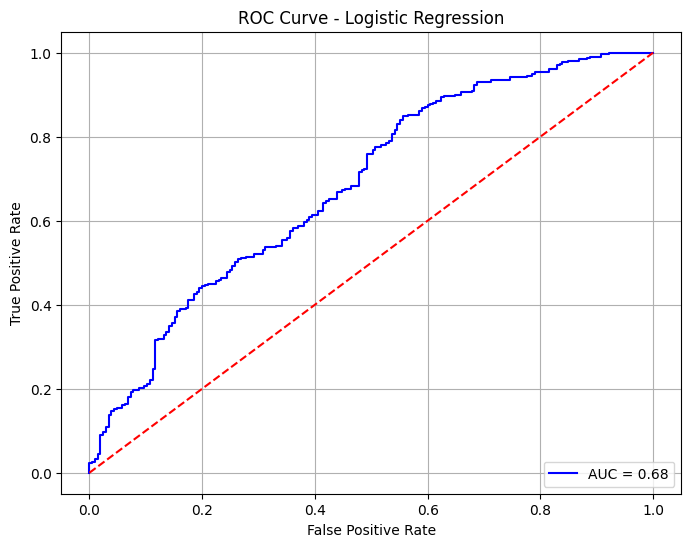

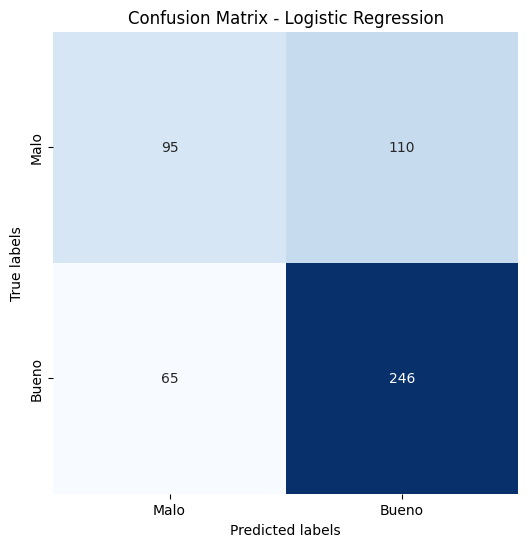

In [219]:
# Calcular probabilidades de clase para Regresión Logística
y_prob_logistic = grid_search_logistic.predict_proba(X_test)[:, 1]

# Calcular la curva ROC para Regresión Logística
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_prob_logistic)

# Calcular el AUC-ROC para Regresión Logística
auc_logistic = roc_auc_score(y_test, y_prob_logistic)

# Graficar la curva ROC para Regresión Logística
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color="blue", label=f"AUC = {auc_logistic:.2f}")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Visualizar la matriz de confusión para Regresión Logística
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.xticks(ticks=[0.5, 1.5], labels=["Malo", "Bueno"])
plt.yticks(ticks=[0.5, 1.5], labels=["Malo", "Bueno"])
plt.show()

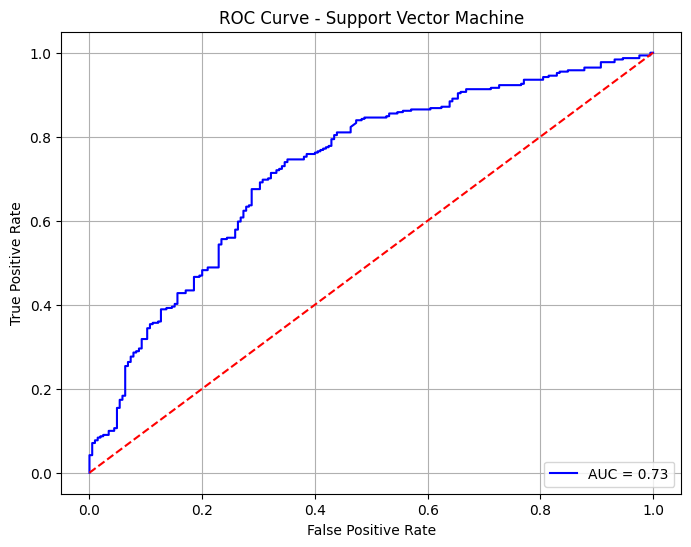

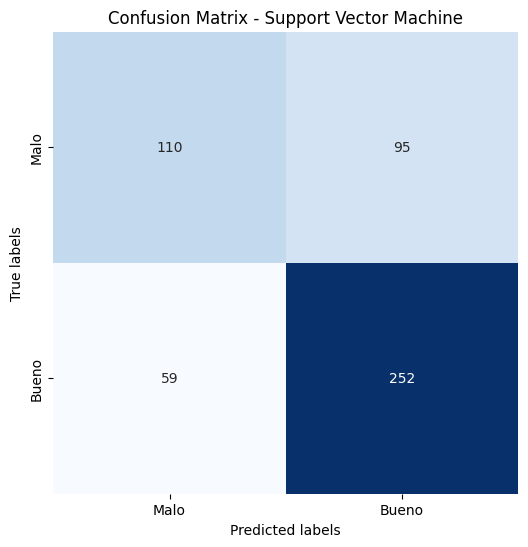

In [220]:
# Calcular probabilidades de clase para SVM
y_prob_svm = grid_search_svm.predict_proba(X_test)[:, 1]

# Calcular la curva ROC para SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

# Calcular el AUC-ROC para SVM
auc_svm = roc_auc_score(y_test, y_prob_svm)

# Graficar la curva ROC para SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color="blue", label=f"AUC = {auc_svm:.2f}")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Support Vector Machine")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Visualizar la matriz de confusión para SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - Support Vector Machine")
plt.xticks(ticks=[0.5, 1.5], labels=["Malo", "Bueno"])
plt.yticks(ticks=[0.5, 1.5], labels=["Malo", "Bueno"])
plt.show()